In [1]:
from sklearn.datasets import load_files       
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from glob import glob
import dlib
import cv2
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm
import matplotlib.pyplot as plt        

In [2]:
def load(filePath):
    dogSet=np.array(load_files(filePath)['filenames'])
    dogTarget=np_utils.to_categorical(np.array(load_files(filePath)['target']),133)
    return dogSet, dogTarget

In [3]:
trainSet, trainTarget=load('dogImages/train')
valSet, valTarget= load('dogImages/valid')
testSet, testTarget=load('dogImages/test')

In [4]:
n=[]
for i in sorted(glob("dogImages/train/*/")):
    n.append(i[20:-1])
dog_names=np.array(n)

In [5]:
print('No. of dog categories:', len(dog_names))
print('There are total dog images: ', len(np.hstack([trainSet, valSet, testSet])))
print('There are training dog images: ', len(trainSet))
print('There are validation dog images: ',len(valSet))
print('There are test dog images: ',len(testSet))

No. of dog categories: 133
There are total dog images:  8351
There are training dog images:  6680
There are validation dog images:  835
There are test dog images:  836


In [6]:
humanSet= np.array(glob("lfw/*/*"))

In [7]:
print('Total no. of human images: ', len(humanSet))

Total no. of human images:  13234


In [8]:
def setDetector():
    detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    return detector

In [9]:
detector=setDetector()

Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 1


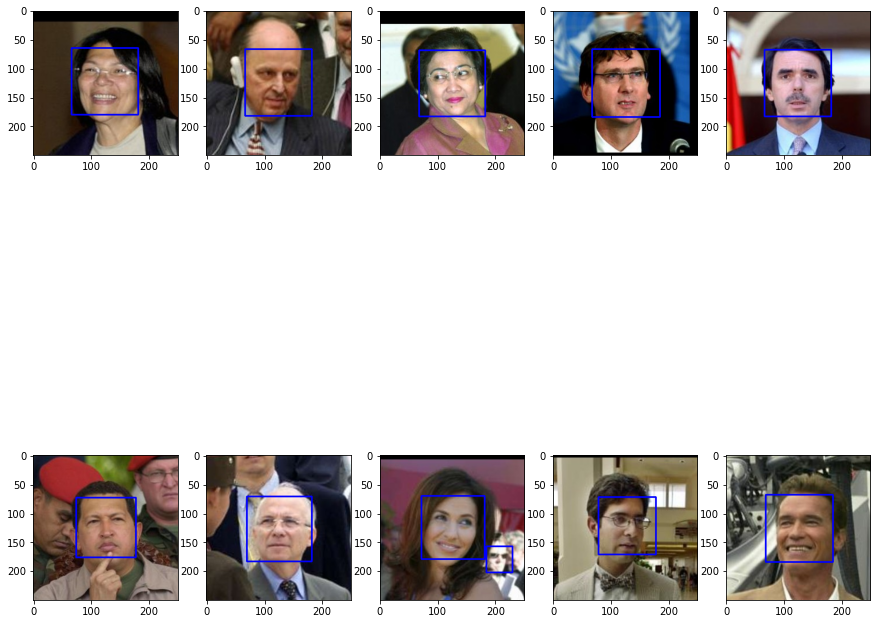

In [10]:
import cv2 
import dlib
import matplotlib.pyplot as plt                        
import random
import matplotlib as mpl   
%matplotlib inline

fig, ax = plt.subplots(2, 5, figsize=(15,15))


for i in range(10):
    img_index = random.randint(0, len(humanSet)-1)    
    img = cv2.imread(humanSet[img_index])  # BGR image is read
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
    # draw triangle arpound the face
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,5, i+1)
    plt.imshow(cv_rgb)

In [11]:
def isHumanFaceDetected(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(gray)
    return len(faces) > 0

In [12]:
from tqdm import tqdm
#testing the face detector using 200 images
humanSubSet = humanSet[:200]
dogSubSet = trainSet[:200]

results = []
for f in (humanSubSet):
    img = cv2.imread(f)  # BGR image is read
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    results.append(isHumanFaceDetected(f))
resultHuman = np.array(results)
print("No. of human faces detected in human imgs are {} out of 200 ".format(np.sum(resultHuman)))

# calculate percentage of detected human faces in dog_files

results = []
for f in (dogSubSet):
    results.append(isHumanFaceDetected(f))
resultDog = np.array(results)
print("No. of human faces detected in dog imgs are {} out of 200" .format(np.sum(resultDog)))



No. of human faces detected in human imgs are 194 out of 200 
No. of human faces detected in dog imgs are 27 out of 200


Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 4
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1


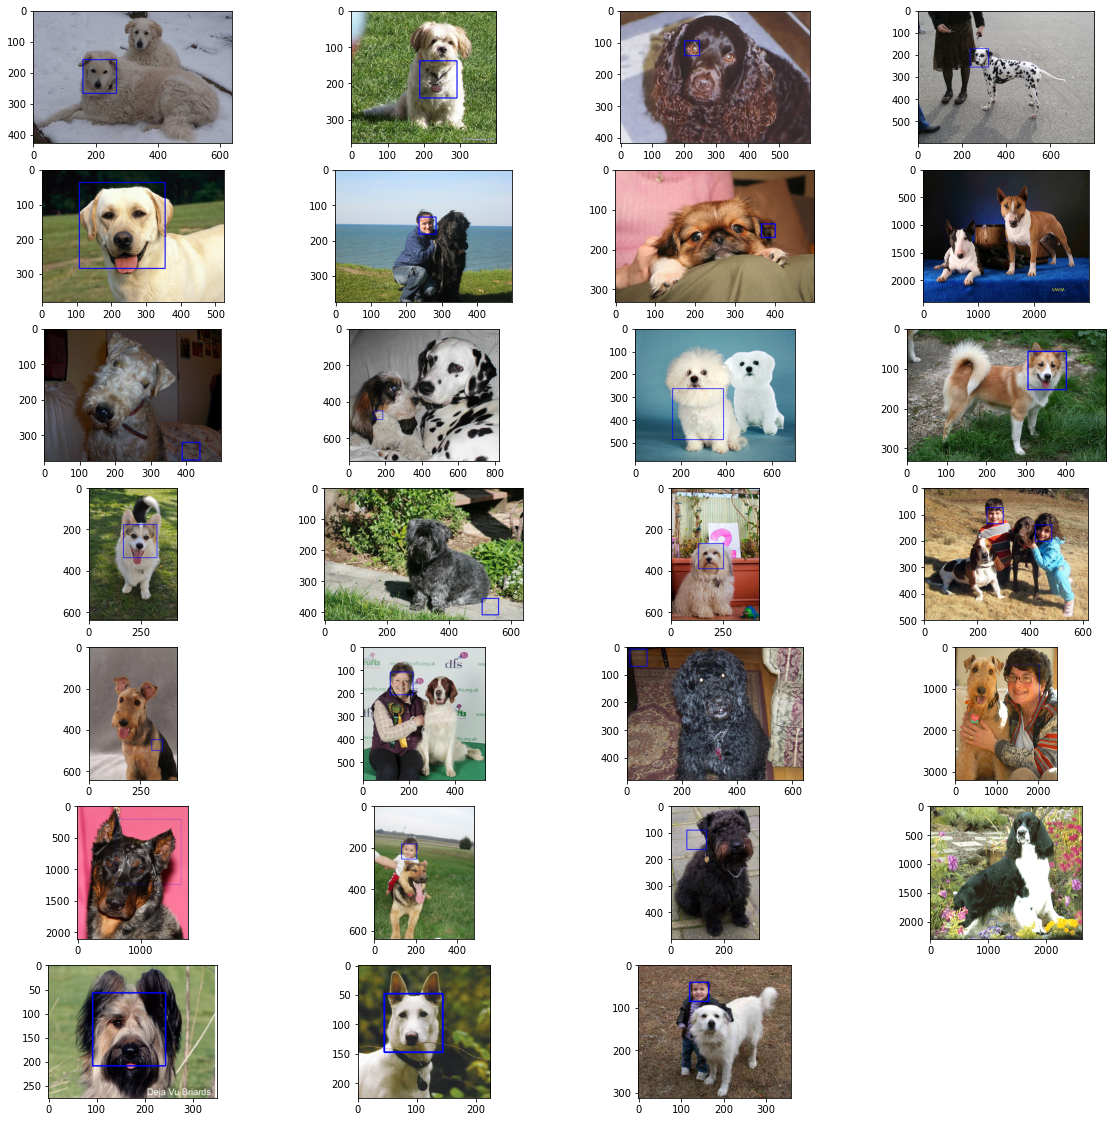

In [13]:
import random
# show those dog images which were falsely detectected to have human faces
fig, ax = plt.subplots(4, 3, figsize=(20,20))
#f=np.asarray(np.where(resultDog))
#$falseIdx=np.ndarray.flatten(f)
falseIdx = np.where(resultDog)[0]
for i, idx in enumerate(falseIdx):
    # load color (BGR) image
    img = cv2.imread(dogSubSet[idx])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
    color = (0, 0, 255) 
    for (x,y,w,h) in faces:
         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    # display the image, along with bounding box
    plt.subplot(7,4, i+1)
    plt.imshow(cv_rgb)

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 0


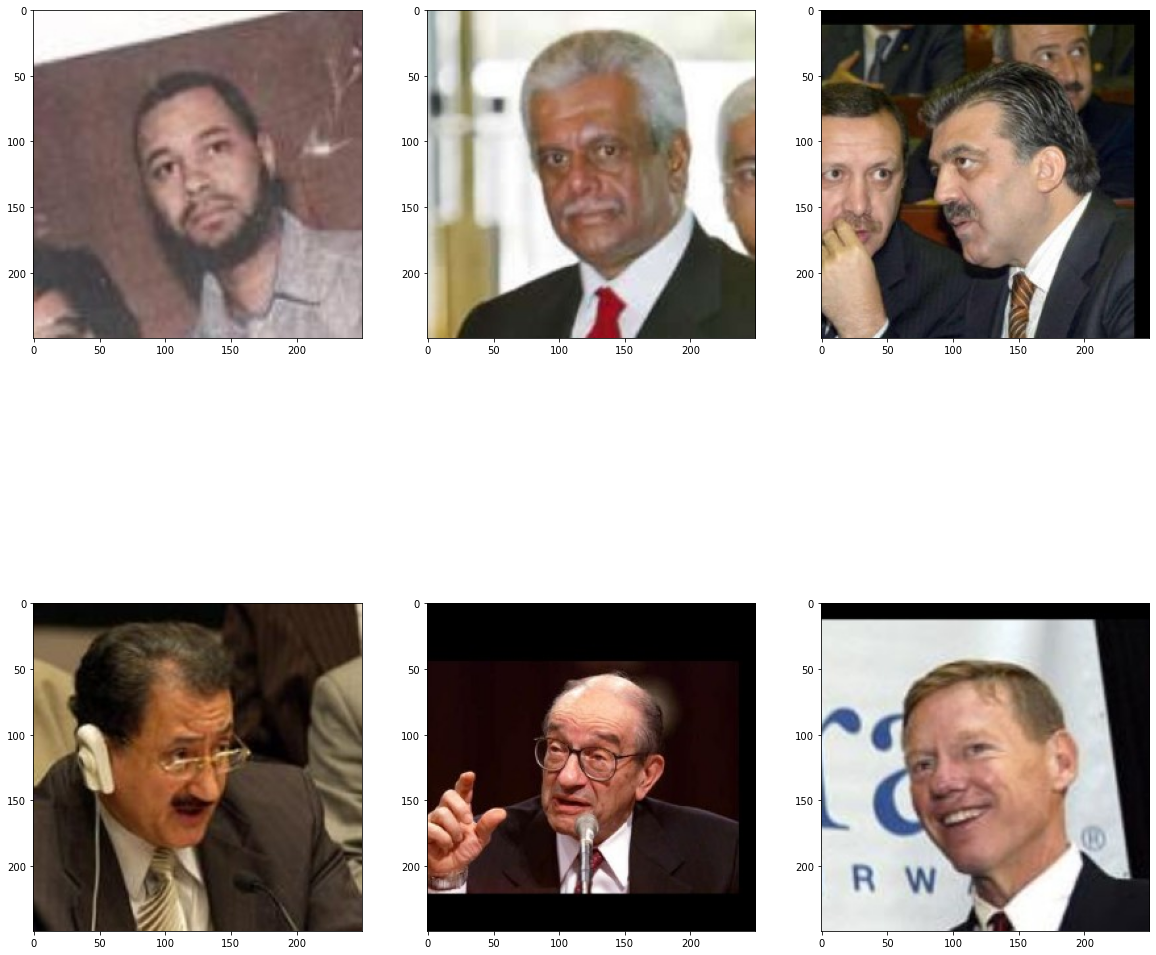

In [14]:
import random
#show those human images in which human faces werent detected
fig, ax = plt.subplots(1, 2, figsize=(20,20))
f=np.asarray(np.where(resultHuman== False))
falseIdx=np.ndarray.flatten(f)
for i, idx in enumerate(falseIdx):
    # load color (BGR) image
    img = cv2.imread(humanSubSet[idx])
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find faces in image
    faces = detector.detectMultiScale(gray)

    # print number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # get bounding box for each detected face
    color = (0, 0, 255) 
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    plt.subplot(2,3, i+1)
    plt.imshow(cv_rgb)

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [16]:
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm
def makeTensor(file):
    img=image.load_img(file,target_size=(224,224))
    return np.expand_dims(image.img_to_array(img),axis=0)

def makeTensors(files):
    x=[makeTensor(file) for file in tqdm(files)]
    return np.vstack(x)


In [17]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50Predictions(file):
    img = preprocess_input(makeTensor(file))
    return np.argmax(ResNet50_model.predict(img))

In [18]:

def isDogDetected(file):
    prediction = ResNet50Predictions(file)
    return ((prediction <= 268) & (prediction >= 151))

In [20]:
humanSubSet = humanSet[:200]
dogSubSet = trainSet[:100]

# calculate percentage of detected human faces in human_files
results = []
for file in (humanSubSet):
    results.append(isDogDetected(file))
humanResults = np.array(results)
print("percentage of detected dogs in human files: {} %".format(np.sum(humanResults)))

# calculate percentage of detected human faces in dog_files
results = []
for file in (dogSubSet):
    results.append(isDogDetected(file))
dogResults = np.array(results)
print("percentage of detected dogs in dog files: {} %".format(np.sum(dogResults)))

percentage of detected dogs in human files: 1 %
percentage of detected dogs in dog files: 100 %


In [21]:
np.where(humanResults)

(array([194], dtype=int64),)

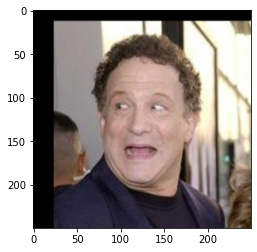

In [22]:
img = cv2.imread(humanSet[194])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

In [23]:
#Step3

In [24]:
#using vgg16 (transfer learning)

In [25]:
data = np.load('DogVGG16Data.npz')
train_VGG16 = data['train']
valid_VGG16 = data['valid']
test_VGG16 = data['test']

In [26]:
train_VGG16.shape

(6680, 7, 7, 512)

In [27]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [28]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:

from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='weights.best.VGG16.hdf5', verbose=1, save_best_only=True)


VGG16_history = VGG16_model.fit(train_VGG16, trainTarget, 
          validation_data=(valid_VGG16, valTarget),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/20
308/334 [==========================>...] - ETA: 0s - loss: 7.3306 - accuracy: 0.3909
Epoch 00001: val_loss improved from inf to 3.76074, saving model to weights.best.VGG16.hdf5
334/334 [==============================] - 1s 3ms/step - loss: 7.0389 - accuracy: 0.4042 - val_loss: 3.7607 - val_accuracy: 0.5749
Epoch 2/20
309/334 [==========================>...] - ETA: 0s - loss: 2.2868 - accuracy: 0.7032
Epoch 00002: val_loss improved from 3.76074 to 3.19803, saving model to weights.best.VGG16.hdf5
334/334 [==============================] - 1s 2ms/step - loss: 2.2878 - accuracy: 0.7040 - val_loss: 3.1980 - val_accuracy: 0.6491
Epoch 3/20
325/334 [============================>.] - ETA: 0s - loss: 1.3929 - accuracy: 0.7957
Epoch 00003: val_loss improved from 3.19803 to 3.01389, saving model to weights.best.VGG16.hdf5
334/334 [==============================] - 1s 2ms/step - loss: 1.3973 - accuracy: 0.7943 - val_loss: 3.0139 - val_accuracy: 0.6790
Epoch 4/20
312/334 [===============

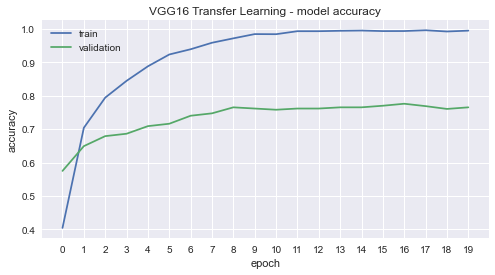

In [30]:

epochs = 20
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
plt.plot(VGG16_history.history['accuracy'])
plt.plot(VGG16_history.history['val_accuracy'])
plt.title('VGG16 Transfer Learning - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
_ = plt.xticks(range(0, epochs))

In [32]:
from keras.models import load_model 
VGG16_model.save('BreedDetector.h5')